<a href="https://colab.research.google.com/github/risherb/Are-You-also-Fooled-AI/blob/main/ARE_YOU_FOOLED_BY_AI_%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are You Fooled By A.I.?

## Introduction


In today's image-driven world, distinguishing between real camera-captured photos and AI-generated ones poses a significant challenge. With the rise of powerful generative models like GANs, the need for accurate classifiers is paramount.

This project addresses this challenge by developing a classifier capable of discerning between authentic and AI-generated images. By leveraging machine learning techniques and a meticulously curated dataset, we aim to train a robust model.

Moreover, to ensure ease of use and reproducibility, the project demonstrates importing and executing code using Google Colab. By offering clear instructions, we aim to empower practitioners of all levels to engage with the classification task effectively.

Ultimately, this project seeks to provide a practical solution while promoting accessibility and transparency in AI development.


### Importing Data Using Google Colab

This code demonstrates uploading data into a Google Colab notebook using the files module. It simplifies the process of accessing external datasets, enhancing project workflow efficiency.

In [ ]:
!kaggle datasets download -d rafsunahmad/camera-photos-vs-ai-generated-photos-classifier

Dataset URL: https://www.kaggle.com/datasets/rafsunahmad/camera-photos-vs-ai-generated-photos-classifier
License(s): U.S. Government Works
 99% 189M/192M [00:09<00:00, 23.5MB/s]
100% 192M/192M [00:09<00:00, 21.0MB/s]


### Extracting Zip File Using Python

photos-vs-ai-generated-photos-classifier.zip" into the specified directory ("/content"). It simplifies the process of unzipping files within a Python environment, facilitating data preparation for further analysis or model training.

In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/camera-photos-vs-ai-generated-photos-classifier.zip')
zip.extractall('/content')
zip.close()

### Importing Libraries

**Description:** This code imports necessary libraries for data manipulation, visualization, deep learning model building, and image preprocessing. Libraries such as Pandas, NumPy, Matplotlib, Seaborn, TensorFlow, PIL, and OpenCV are imported to facilitate various tasks including data loading, model construction, image manipulation, and display.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import IPython.display as display
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2

### Data Preparation

**Description:** This code segment prepares the dataset for training and testing the model. It defines the base directory for the dataset and separates the AI-generated and real camera-captured images into respective directories. Then, it constructs lists containing file paths for training and testing images, along with corresponding labels indicating whether each image is AI-generated or real. The dataset is split based on the specified ratio (split_ratio) into training and testing subsets. Finally, the order of image paths and labels is randomized to ensure unbiased model training and evaluation.


In [ ]:
BASE_DIR = '/content/ai vs real photos'

ai_images_dir = os.path.join(BASE_DIR, 'Ai_Images')
real_images_dir = os.path.join(BASE_DIR, 'Camera_images')

ai_image_paths = [os.path.join(ai_images_dir, filename) for filename in os.listdir(ai_images_dir) if filename.endswith(('.JPG','.jpg','jpeg'))]
real_image_paths = [os.path.join(real_images_dir, filename) for filename in os.listdir(real_images_dir) if filename.endswith(('.JPG','.jpg','jpeg'))]


split_ratio = 0.8


ai_split_index = int(len(ai_image_paths) * split_ratio)
real_split_index = int(len(real_image_paths) * split_ratio)


train_image_paths_raw = ai_image_paths[:ai_split_index] + real_image_paths[:real_split_index]
test_image_paths_raw = ai_image_paths[ai_split_index:] + real_image_paths[real_split_index:]


train_labels = ['ai'] * ai_split_index + ['real'] * real_split_index
test_labels = ['ai'] * (len(ai_image_paths) - ai_split_index) + ['real'] * (len(real_image_paths) - real_split_index)


random.shuffle(train_image_paths_raw)
random.shuffle(test_image_paths_raw)


In [ ]:
print("Train Image Paths:")
print(train_image_paths_raw[:5])
print("\nTest Image Paths:")
print(test_image_paths_raw[:5])

Train Image Paths:
['/content/ai vs real photos/Camera_images/109.jpg', '/content/ai vs real photos/Ai_Images/66.jpg', '/content/ai vs real photos/Camera_images/Image_1.jpg', '/content/ai vs real photos/Camera_images/188.jpg', '/content/ai vs real photos/Ai_Images/36.jpg']

Test Image Paths:
['/content/ai vs real photos/Camera_images/138.JPG', '/content/ai vs real photos/Ai_Images/164.jpg', '/content/ai vs real photos/Camera_images/111.jpg', '/content/ai vs real photos/Ai_Images/87.jpg', '/content/ai vs real photos/Camera_images/217.jpg']


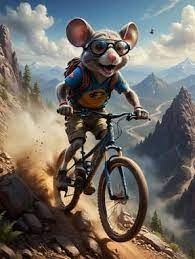

In [ ]:
random_image_path = random.choice(train_image_paths_raw) if train_image_paths_raw else "default_image.jpg"


img = Image.open(random_image_path)


display.display(img)

### Image Data Augmentation and Generators

**Description:** This code segment sets up image data augmentation using Keras' `ImageDataGenerator` to increase the diversity of training samples. Augmentation techniques such as rescaling, rotation, width and height shifting, shear, zoom, and horizontal flipping are applied to the training images. Additionally, a validation split of 20% is specified to reserve a portion of the data for validation during training.

Two data generators, `train_generator` and `validation_generator`, are created using `flow_from_directory` method. They generate batches of augmented images from the specified directory (`BASE_DIR`) with target size of (256,256) and binary class mode. The `subset` parameter is used to distinguish between training and validation data. These generators facilitate efficient feeding of augmented images into the model during training.


In [ ]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The rest of your code remains the same
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)


Found 364 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


### VGG19 Model Tuning

**Description:** This code segment fine-tunes the pre-trained VGG19 model for the classification task. Initially, the pre-trained VGG19 model without the fully connected layers (top layers) is loaded. The convolutional layers are then frozen to prevent their weights from being updated during training.

Custom top layers are added to the model for the specific classification task. This includes a global average pooling layer, a dense layer with 128 units and ReLU activation function, and a final dense layer with 1 unit and sigmoid activation function for binary classification.

The base model and custom top layers are combined to create the `vgg19_tuned_model`. The model is compiled using the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

Finally, the model summary is printed, providing an overview of the model architecture and parameter counts.


In [ ]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Change the input shape to match the target_size in your data generators
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


vgg19_tuned_model = Model(inputs=base_model.input, outputs=predictions)


vgg19_tuned_model.compile(optimizer=Adam(),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])


vgg19_tuned_model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,090,177 (76.64 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Model Compilation and Training

**Description:** This code segment compiles and trains the fine-tuned VGG19 model using the Adam optimizer, binary cross-entropy loss, and accuracy metric.

The model is trained for 10 epochs on the training data (`train_generator`) with validation performed on the validation data (`validation_generator`). Training progress, including performance metrics and loss, is recorded in the `history` variable for analysis.


In [ ]:
vgg19_tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = vgg19_tuned_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step - accuracy: 0.5174 - loss: 0.7308 - val_accuracy: 0.5111 - val_loss: 0.7289
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5206 - loss: 0.7209 - val_accuracy: 0.5556 - val_loss: 0.6750
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 975ms/step - accuracy: 0.6197 - loss: 0.6650 - val_accuracy: 0.6556 - val_loss: 0.6561
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6490 - loss: 0.6376 - val_accuracy: 0.6444 - val_loss: 0.6476
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7116 - loss: 0.6013 - val_accuracy: 0.6556 - val_loss: 0.6406
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
!pip install gradio
import gradio as gr
from keras.preprocessing import image
import numpy as np

def classify_image(img):
    if img is None:
        return "Please upload an image", "Awaiting input...", None

    img = img.resize((256, 256))
    img_array = np.array(img).astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = vgg19_tuned_model.predict(img_array)
    confidence = predictions[0][0]

    result = "Real" if confidence >= 0.5 else "AI Generated"
    confidence_percentage = confidence * 100 if result == "Real" else (1 - confidence) * 100
    return (
        f"{result}",
        f"{confidence_percentage:.1f}%",
        img,
    )

css = """
:root {
    --primary: #4F46E5;
    --primary-light: #818CF8;
    --secondary: #2DD4BF;
    --background: #000000;
    --surface: #0a0a0a;
    --card-bg: #111111;
    --text-primary: #64748B;
    --text-accent: #9CA3AF;
    --border-color: rgba(255, 255, 255, 0.1);
    --shadow: 0 4px 6px -1px rgba(0, 0, 0, 0.5);
    --radius: 16px;
}

body {
    font-family: 'Inter', -apple-system, sans-serif;
    background: var(--background);
    color: var(--text-primary);
}

.container {
    max-width: 1200px;
    margin: 0 auto;
    padding: 3rem 2rem;
}

.header-section {
    text-align: center;
    margin-bottom: 4rem;
}

.main-title {
    font-size: 3.5rem;
    font-weight: 800;
    background: linear-gradient(135deg, var(--primary) 0%, var(--secondary) 100%);
    -webkit-background-clip: text;
    background-clip: text;
    -webkit-text-fill-color: transparent;
    margin-bottom: 1rem;
    line-height: 1.2;
}

.subtitle {
    font-size: 1.25rem;
    color: var(--text-accent);
    max-width: 600px;
    margin: 0 auto;
    line-height: 1.6;
}

.card {
    background: var(--card-bg);
    border-radius: var(--radius);
    padding: 2rem;
    box-shadow: var(--shadow);
    height: 100%;
    transition: all 0.4s cubic-bezier(0.4, 0, 0.2, 1);
    border: 1px solid var(--border-color);
    backdrop-filter: blur(10px);
}

.card:hover {
    transform: translateY(-4px);
    border-color: rgba(255, 255, 255, 0.2);
    box-shadow: 0 8px 20px -4px rgba(0, 0, 0, 0.7);
}

.card-title {
    font-size: 1.5rem;
    font-weight: 700;
    color: var(--text-accent);
    margin-bottom: 1.5rem;
}

#image-input {
    border: 2px dashed rgba(255, 255, 255, 0.1) !important;
    border-radius: var(--radius) !important;
    padding: 1rem !important;
    background: var(--surface) !important;
    transition: all 0.3s ease !important;
}

#image-input:hover {
    border-color: var(--primary-light) !important;
    background: rgba(79, 70, 229, 0.05) !important;
}

#analyze-btn {
    background: var(--card-bg) !important;
    border: 1px solid var(--border-color) !important;
    border-radius: var(--radius) !important;
    color: var(--text-accent) !important;
    padding: 1rem 2rem !important;
    font-weight: 600 !important;
    font-size: 1.1rem !important;
    width: 100% !important;
    transition: all 0.3s cubic-bezier(0.4, 0, 0.2, 1) !important;
    margin-top: 1rem !important;
    position: relative;
    overflow: hidden;
}

#analyze-btn::before {
    content: '';
    position: absolute;
    top: 50%;
    left: 50%;
    width: 0;
    height: 0;
    background: rgba(79, 70, 229, 0.2);
    border-radius: 50%;
    transform: translate(-50%, -50%);
    transition: width 0.6s ease, height 0.6s ease;
}

#analyze-btn:hover::before {
    width: 300px;
    height: 300px;
}

#analyze-btn:hover {
    border-color: var(--primary-light) !important;
    transform: translateY(-2px);
    box-shadow: 0 4px 12px rgba(79, 70, 229, 0.15);
}

.result-box {
    background: var(--surface);
    border-radius: calc(var(--radius) - 4px);
    padding: 1.5rem;
    margin: 1rem 0;
    border: 1px solid var(--border-color);
}

.result-display {
    font-size: 2rem !important;
    font-weight: 700 !important;
    color: var(--primary-light) !important;
    text-align: center !important;
    margin: 0.5rem 0 !important;
}

.confidence-display {
    font-size: 1.25rem !important;
    font-weight: 500 !important;
    color: var(--text-accent) !important;
    text-align: center !important;
}

.footer {
    text-align: center;
    padding-top: 4rem;
    color: var(--text-accent);
    font-size: 0.9rem;
}

@keyframes pulse {
    0%, 100% { opacity: 1; }
    50% { opacity: 0.5; }
}

.loading {
    animation: pulse 1.5s ease-in-out infinite;
}

.label-text {
    font-size: 1.1rem;
    font-weight: 600;
    color: var(--text-accent);
    margin-bottom: 0.75rem;
}

.image-preview {
    border-radius: calc(var(--radius) - 4px) !important;
    overflow: hidden !important;
    background: var(--surface) !important;
}

::-webkit-scrollbar {
    width: 8px;
}

::-webkit-scrollbar-track {
    background: var(--background);
}

::-webkit-scrollbar-thumb {
    background: var(--primary-light);
    border-radius: 4px;
}
"""

theme = gr.themes.Base().set(
    body_background_fill="var(--background)",
    block_background_fill="var(--surface)",
    block_label_background_fill="transparent",
    input_background_fill="var(--surface)",
)

with gr.Blocks(theme=theme, css=css) as demo:
    gr.HTML("""
        <div class="container">
            <div class="header-section">
                <h1 class="main-title">PixelProof™</h1>
                <p class="subtitle">Unveil the truth behind every pixel. Our AI detective analyzes images with precision to reveal whether they're authentically captured or AI-generated masterpieces.</p>
            </div>
    """)

    with gr.Row(equal_height=True):
        with gr.Column(scale=1):
            with gr.Group(elem_classes="card"):
                gr.Markdown("### 🎯 Upload Your Mystery Image", elem_classes="card-title")
                image_input = gr.Image(
                    label="",
                    type="pil",
                    elem_id="image-input",
                    elem_classes="image-preview",
                    height=300
                )
                analyze_btn = gr.Button(
                    "🔍 Analyze Image",
                    elem_id="analyze-btn"
                )

        with gr.Column(scale=1):
            with gr.Group(elem_classes="card"):
                gr.Markdown("### ✨ Analysis Insights", elem_classes="card-title")
                with gr.Group(elem_classes="result-box"):
                    prediction = gr.Textbox(
                        label="Verdict",
                        value="Awaiting image analysis...",
                        elem_classes="result-display"
                    )
                    confidence = gr.Textbox(
                        label="Certainty Level",
                        value="",
                        elem_classes="confidence-display"
                    )
                output_image = gr.Image(
                    label="Analyzed Image",
                    elem_classes="image-preview",
                    height=300
                )

    gr.HTML("""
            <div class="footer">
                <p>Created with precision by the AI Research Team • Pushing the boundaries of image analysis</p>
            </div>
        </div>
    """)

    analyze_btn.click(
        fn=classify_image,
        inputs=image_input,
        outputs=[prediction, confidence, output_image],
    )

demo.launch(debug=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off,

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
import gradio as gr
from keras.preprocessing import image
import numpy as np

# Function to process and predict the class of the uploaded image
def classify_image(img):
    img = img.resize((256, 256))  # Resize image to match model input (256x256)
    img_array = np.array(img).astype('float32') / 255.0  # Normalize image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = vgg19_tuned_model.predict(img_array)  # Make prediction
    confidence = predictions[0][0]

    # Classify based on confidence score
    result = "Real" if confidence >= 0.5 else "AI"
    confidence_percentage = confidence * 100 if result == "Real" else (1 - confidence) * 100
    return f"Predicted Class: {result}", f"Confidence: {confidence_percentage:.2f}%", img

# Gradio UI
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## **AI vs Real Photos Classifier**")
    gr.Markdown(
        """
        Upload an image to determine whether it's captured by a camera or generated by AI.
        """
    )

    # Image Upload and Output Panel
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(label="Upload Image", type="pil")
            predict_button = gr.Button("Classify Image")
        with gr.Column():
            prediction_result = gr.Textbox(label="Result", interactive=False)
            confidence_score = gr.Textbox(label="Confidence Score", interactive=False)
            display_image = gr.Image(label="Uploaded Image")

    # History Section
    with gr.Row():
        with gr.Column():
            gr.Markdown("### Prediction History")
            history = gr.Textbox(label="History Log", lines=6, interactive=False)

    # Linking functions to UI
    predict_button.click(
        classify_image,
        inputs=image_input,
        outputs=[prediction_result, confidence_score, display_image]
    )

# Launch the Gradio interface
demo.launch(debug=True)